## **Credit Card Approval prediction**

**A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.**


**Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.**

### **<font color='blue'>AIM**

**The primary objective of this project is to build a robust machine learning model that can evaluate credit card applicants' data and make informed predictions regarding their approval likelihood. This model will be trained on historical credit application data, utilizing a wide range of features such as income, income type, employment, education, housing and more. Through data preprocessing, feature engineering, and model training, I aim to create a accurate and interpretable credit card approval prediction model.**

In [1]:
import pyforest

In [2]:
# The input or feature columns
X=pd.read_csv('Credit_card.csv')

<IPython.core.display.Javascript object>

In [3]:
# The ouput or target columns
Y=pd.read_csv('Credit_card_label.csv')

<IPython.core.display.Javascript object>

In [4]:
# Merged Input and Output data for now.
data = pd.merge(X,Y)

<IPython.core.display.Javascript object>

### **<font color='blue'>Basic exploration of the data and dealing with missing values.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [7]:
# Renamed label column to output for easier understanding.
data=data.rename(columns= {'label':'Output'})

#### **Basic Analysis**
- **Out of 19 columns, 15 of them are categorical columns. These includes 1 ordinal column and the rest nominal columns**
- **The rest consists of ID, Annual income, Birthday count, employed days. These are continous quantitative data.**
- **This is a classification task.**

In [6]:
data.duplicated().sum()

0

In [8]:
data['Output'].value_counts()

0    1373
1     175
Name: Output, dtype: int64

**<font color='red'>I noticed that the target column is highly imbalanced and from that we can understand that the likelihood of rejecting a applicant's request for credit card is far less than approving (89:11) .I should go ahead with a tree based model or a boosting algorithm. Will do balancing of the data later.**

In [9]:
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
Output               0
dtype: int64

<Axes: >

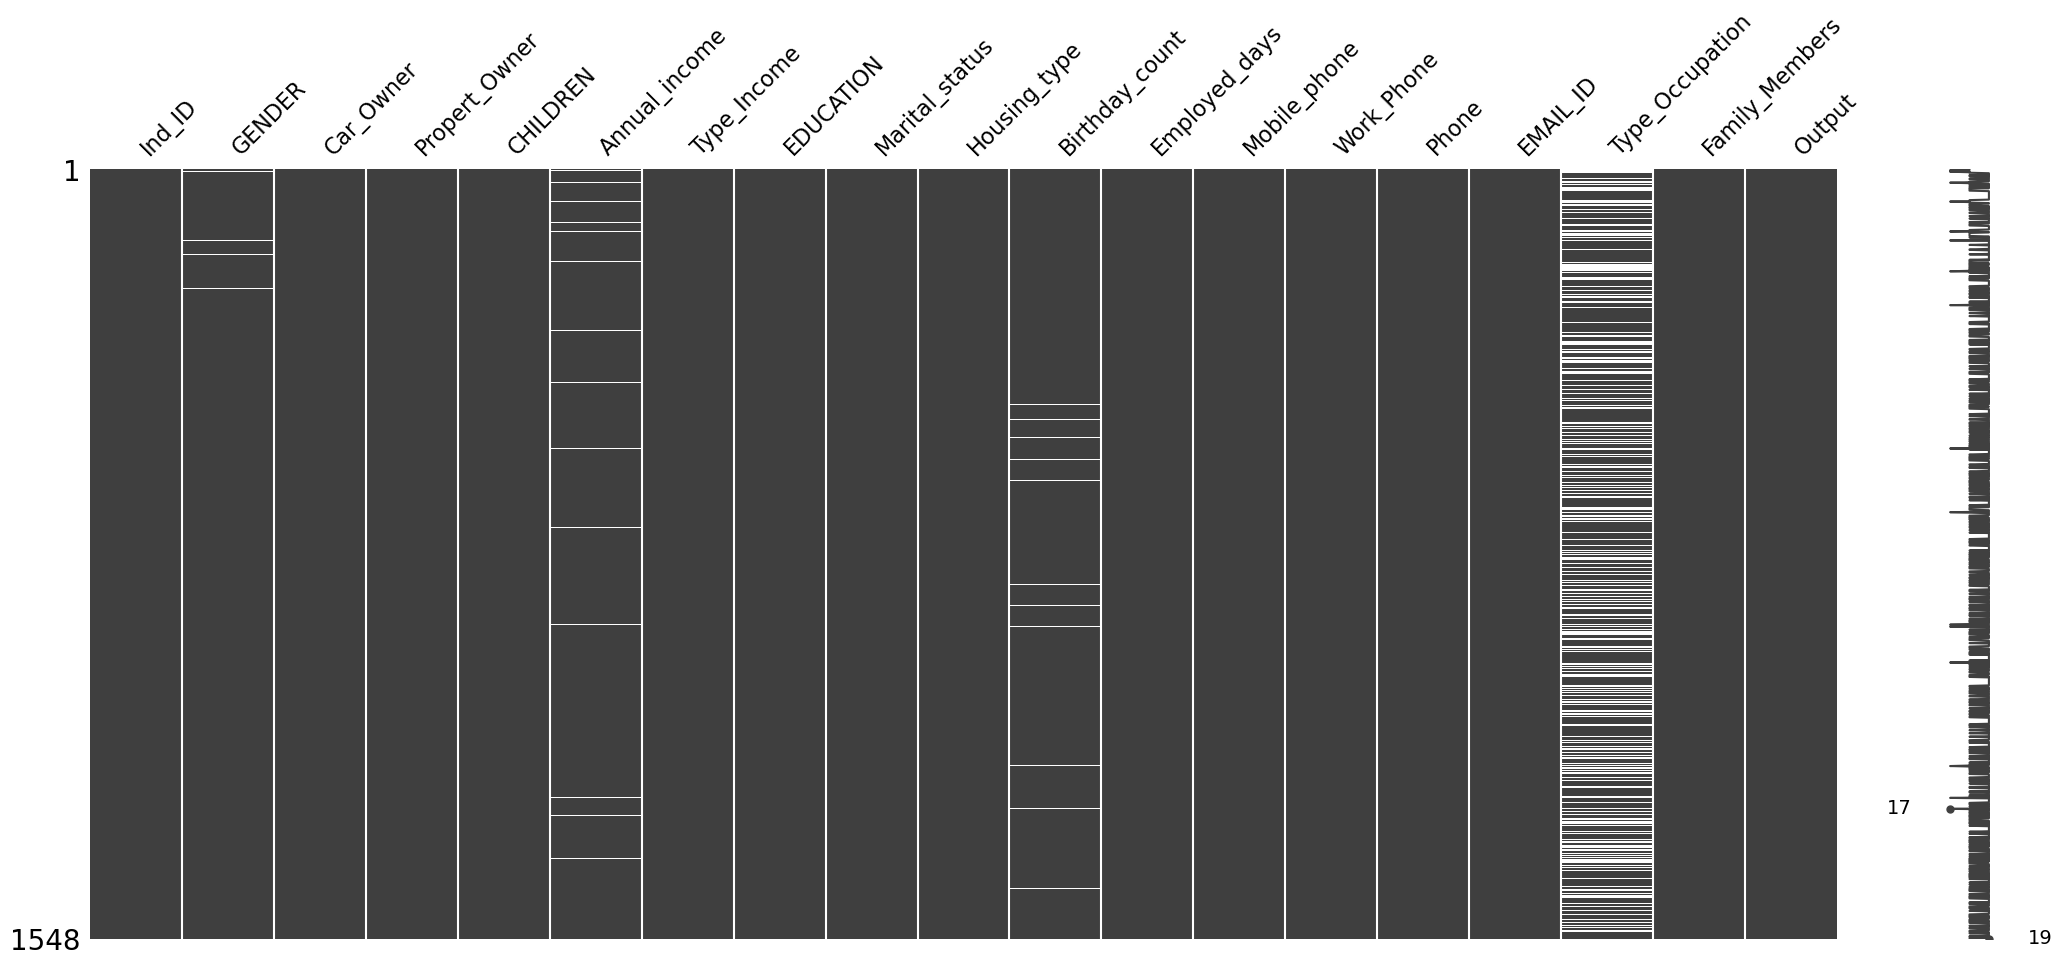

In [12]:
import missingno as msno

msno.matrix(data)

In [10]:
# Percentage of missing values
round((data.isnull().sum()/len(data))*100,3)

Ind_ID              0.000
GENDER              0.452
Car_Owner           0.000
Propert_Owner       0.000
CHILDREN            0.000
Annual_income       1.486
Type_Income         0.000
EDUCATION           0.000
Marital_status      0.000
Housing_type        0.000
Birthday_count      1.421
Employed_days       0.000
Mobile_phone        0.000
Work_Phone          0.000
Phone               0.000
EMAIL_ID            0.000
Type_Occupation    31.525
Family_Members      0.000
Output              0.000
dtype: float64

**<font color='red'>Here we can see that more than 30% of the data is missing from 'Type_Occupation column which tells us the occupation of the clients might not hold major importance to the target column. And when checking the relation between the missing values of the columns, I couldn't see any relation.So it is safe to assume they are Missing at Random.**

**<font color='green'>Since so much is missing, we are going to delete the column because filling or imputing it will only create biased values which will affect our analysis and ML model in the end.**

In [8]:
data.drop(columns='Type_Occupation',inplace=True)

**For the rest of the columns with missing values (these columns cannot be left as 0 or null), I'm going to use KNN imputation because it is the easiest and advanced imputation technique since outlier presence will not affect the method.**

In [9]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()
data['Annual_income']=knn_imputer.fit_transform(data[['Annual_income']])

In [10]:
data['Birthday_count']=knn_imputer.fit_transform(data[['Birthday_count']])
data.isnull().sum()

Ind_ID            0
GENDER            7
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
Output            0
dtype: int64

**<font color='green'>I have filled/imputed all the missing values in the "Annual_income" and "Birthday_count".**


**<font color='green'>Since there are only 7 missing rows in GENDER column, I'm going to delete those rows because I feel filling out the missing values of a significant column like GENDER would not be the right way.**

In [11]:
data[data['GENDER'].isnull()]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Output
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
28,5025127,NaN,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-11111.0,-3350,1,0,0,0,2,1
82,5068651,NaN,Y,Y,0,360000.0,State servant,Higher education,Separated,House / apartment,-19305.0,-1905,1,0,0,0,1,1
143,5126278,NaN,N,N,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21244.0,365243,1,0,0,0,2,1
171,5149192,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,-9847.0,-502,1,0,1,1,3,1
188,5054058,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,-15045.0,-4686,1,0,1,0,3,0
240,5028615,NaN,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,-10681.0,-2152,1,0,1,0,1,0


In [11]:
data.drop(data[data['GENDER'].isnull()].index,axis=0, inplace=True)

In [10]:
data.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
Output            0
dtype: int64

#### **Converting Birthday count to Age and Employed days into Experience columns.**

In [12]:
from datetime import datetime, timedelta
current_date = datetime.now()
data['Birthdate'] = current_date - data['Birthday_count'].apply(lambda x: timedelta(days=x))
data['Age'] = (current_date - data['Birthdate']).astype('<m8[Y]')
data.drop(columns=['Birthdate','Birthday_count'],inplace=True)
data['Age'] = data['Age'].abs()

In [13]:
data['Experience'] = data['Employed_days'] / 365
decimal_precision = 1
data['Experience'] = data['Experience'].round(decimal_precision)
data.drop(columns=['Employed_days'],inplace=True)
data['Experience'] = data['Experience'].abs()

In [14]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Output,Age,Experience
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,1,0,0,0,2,1,52.0,1000.7
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,38.0,1.6
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,44.0,1.6
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,38.0,1.6
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,38.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,2,0,33.0,6.0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,1,0,29.0,3.3
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,1,0,0,0,4,0,37.0,6.8
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,2,0,42.0,1.8


<Axes: xlabel='Age', ylabel='Count'>

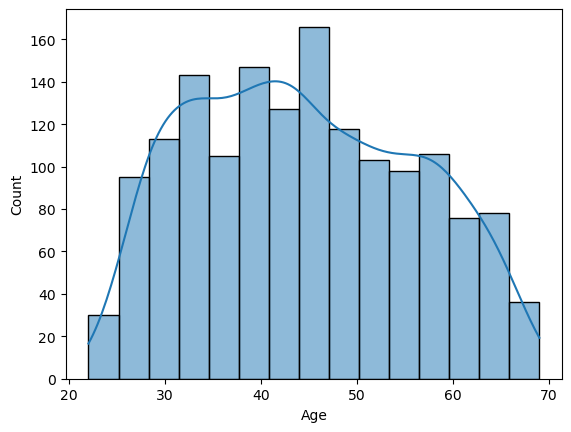

In [16]:
import seaborn as sns
sns.histplot(data['Age'],kde=True)

**This plot shows that people who are of the age 32-45 apply for credit cards.**

**Exporting the cleaned data (Treated missing values), so I can do some more EDA analysis and answer some questions using MySql.**

In [14]:
data.to_csv('data_clean.csv',index=False)

#### **I am going to remove some columns that won't be useful or relevent for analysis and prediction.**

In [15]:
data.drop(columns=['Work_Phone','Mobile_phone','Phone','EMAIL_ID'],inplace=True)

### **<font color='blue'>Outlier presence and Treatment.**

In [18]:
data.describe(percentiles=[0.25,0.3,0.35,0.4,0.45,0.5,0.75,0.8,0.85,0.9,0.95,0.99])

,Ind_ID,CHILDREN,Annual_income,Family_Members,Output,Age,Experience
count,1.541000e+03,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000
mean,5.078979e+06,0.413368,1.908057e+05,2.162232,0.110318,44.433485,174.917651
std,4.167137e+04,0.777811,1.121136e+05,0.948492,0.313387,11.497443,372.198861
min,5.008827e+06,0.000000,3.375000e+04,1.000000,0.000000,22.000000,0.200000
25%,5.045113e+06,0.000000,1.215000e+05,2.000000,0.000000,35.000000,3.200000
30%,5.050671e+06,0.000000,1.350000e+05,2.000000,0.000000,37.000000,3.900000
35%,5.054079e+06,0.000000,1.350000e+05,2.000000,0.000000,38.000000,4.500000
40%,5.062136e+06,0.000000,1.485000e+05,2.000000,0.000000,40.000000,5.100000
45%,5.067653e+06,0.000000,1.575000e+05,2.000000,0.000000,42.000000,6.100000
50%,5.078924e+06,0.000000,1.710000e+05,2.000000,0.000000,44.000000,6.800000


**<font color='red'>Looking at the statistical summary of the data I assume that there might be outliers present in:**
- **In some of the last rows in CHILDREN column.**
- **In 80% to MAX of the Experience column. Since there are 260 rows of one wrong value in this column, I am going to delete those rows**
- **In some of the last rows in Family_members column.** 

#### **Let's use IQR to detect and treat the outliers.**

In [16]:
data = data[data['Experience']!=1000.7]

In [17]:
#Creating a Function to detect and treat outliers without including the output column.
def remove_outliers_iqr(data):
    for column in data.columns:
        if column != 'Output' and pd.api.types.is_numeric_dtype(data[column]):
            q1 = np.percentile(data[column], 25)
            q3 = np.percentile(data[column], 75)
            iqr = q3 - q1

            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Explicitly reference the column for which outliers are being checked
            outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
            data = data[~outliers]

    return data

In [18]:
data = remove_outliers_iqr(data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
data.describe(percentiles=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.75,0.8,0.85,0.9,0.95,0.99])

,Ind_ID,CHILDREN,Annual_income,Family_Members,Output,Age,Experience
count,1.118000e+03,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,5.080073e+06,0.446333,180966.600356,2.230769,0.099284,40.593918,6.084347
std,4.138238e+04,0.683794,71662.592312,0.863288,0.299177,9.477847,4.555848
min,5.008865e+06,0.000000,36000.000000,1.000000,0.000000,22.000000,0.200000
10%,5.023836e+06,0.000000,99000.000000,1.000000,0.000000,28.000000,1.100000
15%,5.028925e+06,0.000000,112500.000000,1.000000,0.000000,30.000000,1.500000
20%,5.036573e+06,0.000000,112500.000000,2.000000,0.000000,32.000000,2.000000
25%,5.045867e+06,0.000000,126000.000000,2.000000,0.000000,33.000000,2.500000
30%,5.051160e+06,0.000000,135000.000000,2.000000,0.000000,34.000000,3.000000
35%,5.054460e+06,0.000000,135000.000000,2.000000,0.000000,36.000000,3.600000


**Removed major outliers that was present in some columns.**

#### **Plotted all the columns in a boxplot to make sure there are no more outliers.** 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

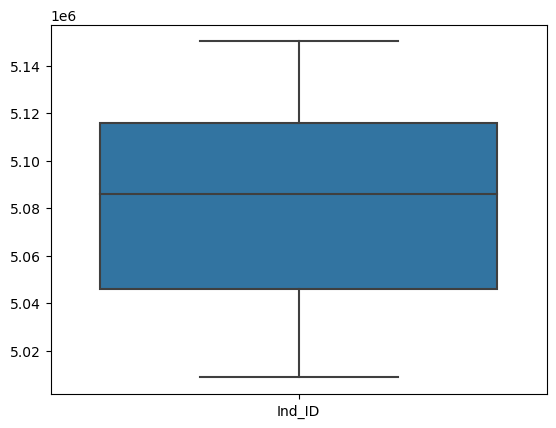

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

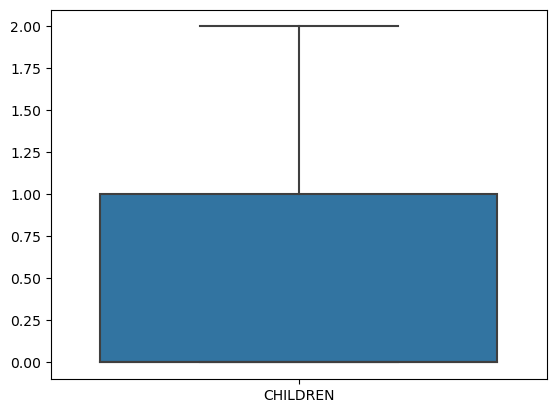

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

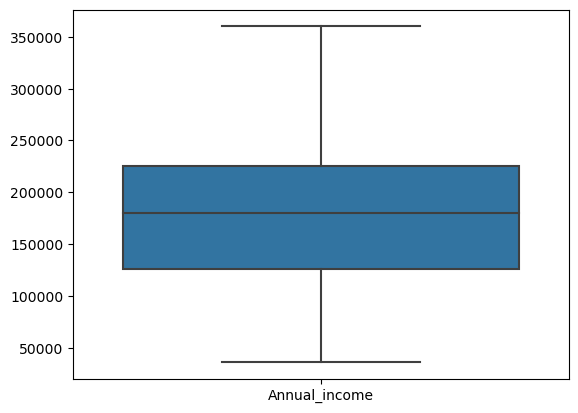

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

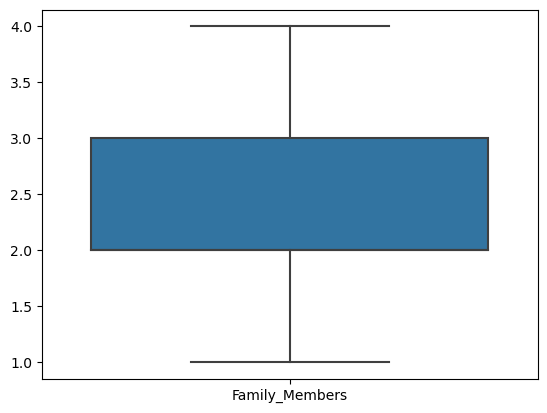

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

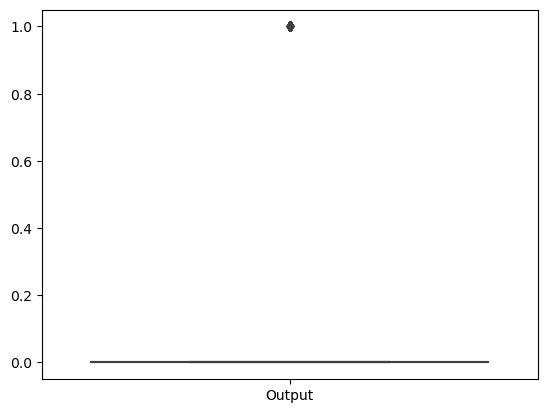

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

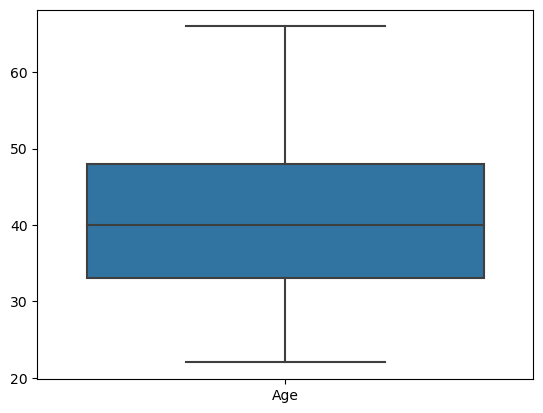

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

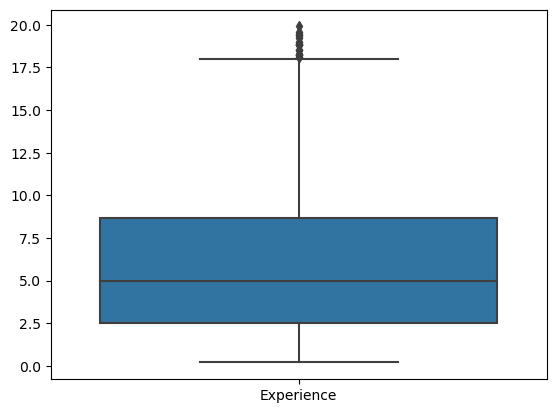

In [18]:
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        sns.boxplot(data[[column]])
        plt.show()

**Shows that Experience column has some more outliers but those can be avoided since they are realistic values.**

<Axes: xlabel='Annual_income', ylabel='Count'>

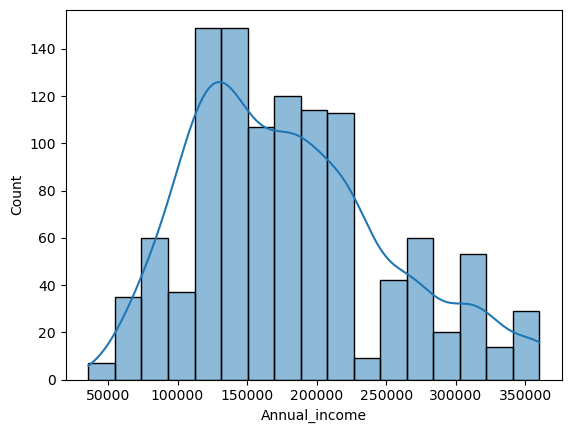

In [22]:
sns.histplot(data['Annual_income'],kde=True)

**Most credit card applicants make around 120000-150000.**

<Axes: xlabel='Experience', ylabel='Count'>

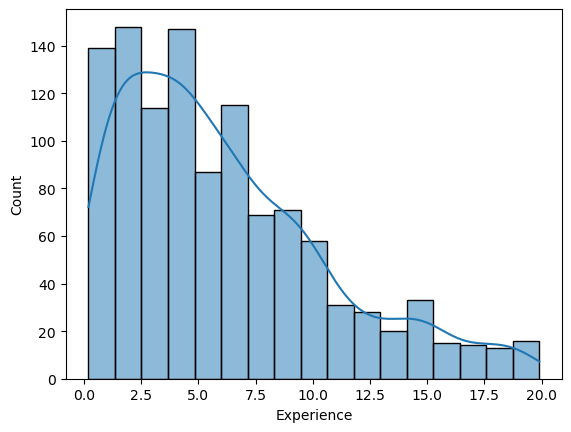

In [23]:
sns.histplot(data['Experience'],kde=True)

**Most applicants who apply for credit card have only a work experience of few months to 5 years.**

<Axes: xlabel='GENDER', ylabel='Count'>

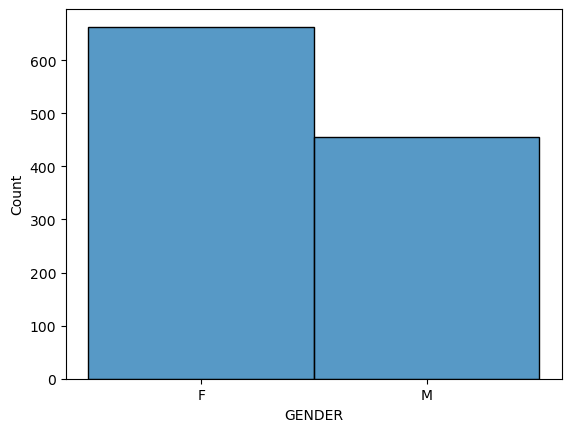

In [26]:
sns.histplot(data['GENDER'])

**There are more female applicants than male applicants.**

In [29]:
data['EDUCATION'].value_counts()

Secondary / secondary special    717
Higher education                 326
Incomplete higher                 60
Lower secondary                   14
Academic degree                    1
Name: EDUCATION, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='Count'>

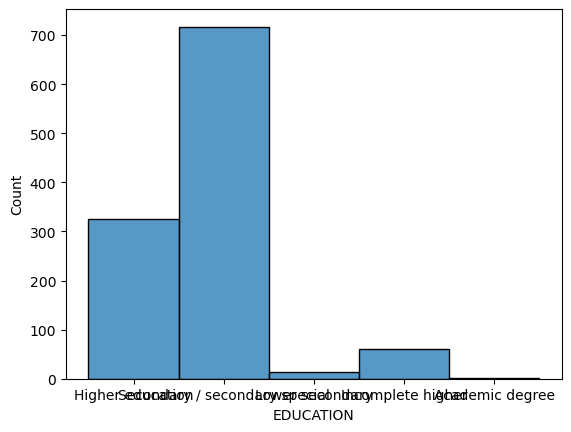

In [28]:
sns.histplot(data['EDUCATION'])

**Majority of applicants have only completed secondary education and only one of 1118 applicants have a academic degree.**

C:\Users\kumba\AppData\Local\Temp\ipykernel_12676\2403623553.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

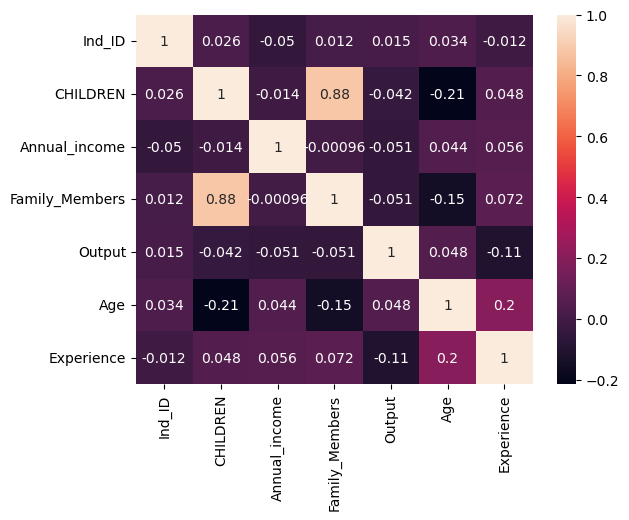

In [30]:
#Checking correlation.  
sns.heatmap(data.corr(),annot=True)

 **From the above heatmap we can see that no feature columns have a major correlation with the target column and I assume it might be because all the features(most) are needed to predict the target column. Or there may be complex relationships between the features that simple correlation measures cannot capture.**

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 1 to 1547
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1118 non-null   int64  
 1   GENDER          1118 non-null   object 
 2   Car_Owner       1118 non-null   object 
 3   Propert_Owner   1118 non-null   object 
 4   CHILDREN        1118 non-null   int64  
 5   Annual_income   1118 non-null   float64
 6   Type_Income     1118 non-null   object 
 7   EDUCATION       1118 non-null   object 
 8   Marital_status  1118 non-null   object 
 9   Housing_type    1118 non-null   object 
 10  Family_Members  1118 non-null   int64  
 11  Output          1118 non-null   int64  
 12  Age             1118 non-null   float64
 13  Experience      1118 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 163.3+ KB


In [21]:
from scipy.stats import skew

In [22]:
numeric_columns = data.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    skewness = skew(data[column])
    print(f"Skewness for '{column}': {skewness}")

Skewness for 'Ind_ID': 0.03171847565979299
Skewness for 'CHILDREN': 1.2277176496033815
Skewness for 'Annual_income': 0.6002030670462318
Skewness for 'Family_Members': 0.5066469296707843
Skewness for 'Output': 2.679981431514727
Skewness for 'Age': 0.30357869065938703
Skewness for 'Experience': 0.9611196665353765


#### **<font color='red'>Here we can see that there are skewness in multiple columns.**
- **'CHILDREN','Annual_income','Family_members','Experience','Age', has slight - moderate positive skewness.**

#### **Before transformation, I am going to split the data into input and output to avoid data leakage.**

### **<font color='blue'>Splitting the data**

**<font color='red'>UPDATE: I figured that the ML model is overfitting as it is giving much importance to the ID column so I am deleting the column as it is not important for our prediction.**

In [23]:
X = data.drop(columns=['Output','Ind_ID'])
Y = data['Output']
print(X.shape)
print(Y.shape)

(1118, 12)
(1118,)


#### **<font color='blue'>Data transformation -- to reduce skewness to normal distibution.**

In [24]:
# Since there is only light skewness in the annual income column, I'm going to transform the column using Squareroot transformation.**

X['Annual_income'] = np.sqrt(X['Annual_income'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.18481911557644032


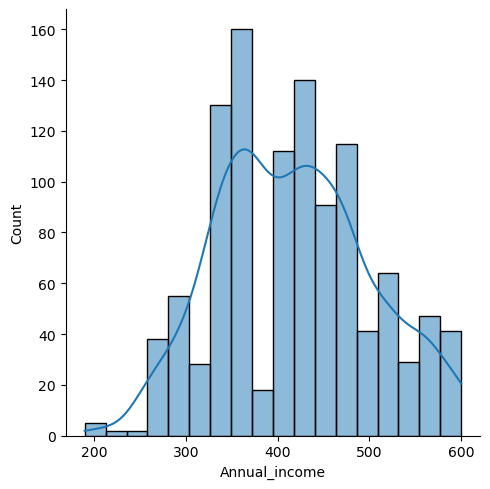

In [25]:
#Check skewness.
sns.displot(X['Annual_income'],kde=True)
print(skew(X['Annual_income']))

**Since the other columns are whole numbers and are realistic values, transforming them wouldn't be right.**

**Now I will head to feature encoding to convert categorical columns into binary (1&0) .**

### **<font color='blue'>Feature Encoding** 

**Simple Binary Encoding**

In [26]:
#Encoding 'Car_Owner','Propert_Owner' columns.
var_list = ['Car_Owner','Propert_Owner']

def binary_map(x):
    return x.map({'Y':1,'N':0})

X[var_list] = X[var_list].apply(binary_map)

In [27]:
#Encoded the gender column using simple binary encoding.
X['GENDER'] = X['GENDER'].map({'F':1,'M':0})

**Dummy Encoding**

In [28]:
#Encoding income type column using dummy encoding.
income_type_enc = pd.get_dummies(X['Type_Income'],drop_first=True)

<IPython.core.display.Javascript object>

In [29]:
X = pd.concat([X,income_type_enc],axis=1)
X.drop(columns=['Type_Income'],inplace=True)

<IPython.core.display.Javascript object>

In [30]:
#Encoding marital status and housing type columns using dummy encoding.
Marital_enc = pd.get_dummies(X['Marital_status'],drop_first=True)
Housing_enc = pd.get_dummies(X['Housing_type'],drop_first=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
X = pd.concat([X,Marital_enc],axis=1)
X.drop(columns=['Marital_status'],inplace=True)

<IPython.core.display.Javascript object>

In [32]:
X = pd.concat([X,Housing_enc],axis=1)
X.drop(columns=['Housing_type'],inplace=True)

<IPython.core.display.Javascript object>

**Ordinal Encoding**

In [33]:
# Encoding Education column with ordinal encoding since there is an order/ranking in the categories.
education_mapping = {
    'Lower secondary': 1,
    'Secondary / secondary special':2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

# Apply the ordinal encoding to the DataFrame
X['EDUCATION_enc'] = X['EDUCATION'].map(education_mapping)

In [34]:
#I have created a new column with the encoded data of education column, So I will delete the original column from the data.
X.drop(columns=['EDUCATION'],inplace=True)

In [35]:
X

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Family_Members,Age,Experience,Pensioner,State servant,...,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,EDUCATION_enc
1,1,1,0,0,561.248608,2,38.0,1.6,0,0,...,1,0,0,0,1,0,0,0,0,4
2,1,1,0,0,561.248608,2,44.0,1.6,0,0,...,1,0,0,0,1,0,0,0,0,4
3,1,1,0,0,437.492087,2,38.0,1.6,0,0,...,1,0,0,0,1,0,0,0,0,4
4,1,1,0,0,561.248608,2,38.0,1.6,0,0,...,1,0,0,0,1,0,0,0,0,4
6,1,1,0,0,561.248608,2,38.0,1.6,0,0,...,1,0,0,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1,0,1,0,437.492087,2,33.0,6.0,0,0,...,1,0,0,0,1,0,0,0,0,4
1544,1,0,0,0,474.341649,1,29.0,3.3,0,0,...,0,0,1,0,1,0,0,0,0,3
1545,0,1,1,2,424.264069,4,37.0,6.8,0,0,...,1,0,0,0,1,0,0,0,0,4
1546,0,1,0,0,519.615242,2,42.0,1.8,0,0,...,0,0,0,0,1,0,0,0,0,2


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 1 to 1547
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GENDER                1118 non-null   int64  
 1   Car_Owner             1118 non-null   int64  
 2   Propert_Owner         1118 non-null   int64  
 3   CHILDREN              1118 non-null   int64  
 4   Annual_income         1118 non-null   float64
 5   Family_Members        1118 non-null   int64  
 6   Age                   1118 non-null   float64
 7   Experience            1118 non-null   float64
 8   Pensioner             1118 non-null   uint8  
 9   State servant         1118 non-null   uint8  
 10  Working               1118 non-null   uint8  
 11  Married               1118 non-null   uint8  
 12  Separated             1118 non-null   uint8  
 13  Single / not married  1118 non-null   uint8  
 14  Widow                 1118 non-null   uint8  
 15  House / apartment    

In [35]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 1118 entries, 1 to 1547
Series name: Output
Non-Null Count  Dtype
--------------  -----
1118 non-null   int64
dtypes: int64(1)
memory usage: 17.5 KB


**<font color='green'>I have completed the encoding process for 7 categorical columns.**

**Next step is to balance the data since there is huge imbalance in the target column.**

### **<font color='blue'>Balancing the data**

In [44]:
#Package for balancing
!pip install -U imbalanced-learn

^C


<Axes: ylabel='Output'>

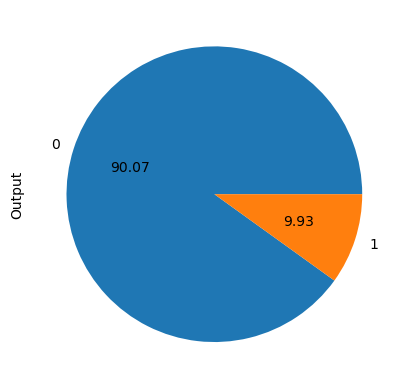

In [49]:
Y.value_counts().plot.pie(autopct='%.2f')

**<font color='red'>Here we can see the data is highly imbalanced thus should do balancing of the data.**

#### **Using SMOTE(Synthetic Minority Oversampling Technique) on the minority to oversample by creating synthetic rows using KNN algorithm.**

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X, Y)

In [37]:
Y_smote.value_counts()

1    1007
0    1007
Name: Output, dtype: int64

In [38]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GENDER                2014 non-null   int64  
 1   Car_Owner             2014 non-null   int64  
 2   Propert_Owner         2014 non-null   int64  
 3   CHILDREN              2014 non-null   int64  
 4   Annual_income         2014 non-null   float64
 5   Family_Members        2014 non-null   int64  
 6   Age                   2014 non-null   float64
 7   Experience            2014 non-null   float64
 8   Pensioner             2014 non-null   uint8  
 9   State servant         2014 non-null   uint8  
 10  Working               2014 non-null   uint8  
 11  Married               2014 non-null   uint8  
 12  Separated             2014 non-null   uint8  
 13  Single / not married  2014 non-null   uint8  
 14  Widow                 2014 non-null   uint8  
 15  House / apartment    

**<font color ='green'>Successfully balanced data using SMOTE technique. Now I have total of 2014 rows that are balanced in the target column.**

### **<font color='blue'>Feature Selection & Splitting**

In [39]:
# apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_smote,Y_smote)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(15,'Score'))  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                   Specs       Score
7             Experience  260.642570
4          Annual_income  204.208561
3               CHILDREN  118.654206
9          State servant   60.844444
0                 GENDER   58.826982
10               Working   56.398281
11               Married   55.434783
19          With parents   34.679012
5         Family_Members   32.231954
6                    Age   31.678260
1              Car_Owner   24.396739
2          Propert_Owner   22.244973
15     House / apartment   19.864228
13  Single / not married   18.290323
20         EDUCATION_enc   14.843457


#### **We can see that Experience, Annual income and having children are important or crucial in this prediction. But other features have relatively good score too.**

 **Here I am going to split the data into train and test and will be conducting cross validation. Upon testing and realisation I am not going to split the data into train, validation, test datas as we don't have enough data for training and proper testing**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote,test_size=0.2, random_state=42)

### **<font color='blue'>Model building and Hyperparameter tuning**

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#### **Logistic Regression**

In [40]:
#Predicting validation data
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l1',C=10,solver='liblinear',random_state=25)
log.fit(X_train,y_train)
y_pred_test = log.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.7468982630272953

In [43]:
#Checking overfitting
y_pred_train = log.predict(X_train)
accuracy_score(y_train, y_pred_train)
#f1_score(y_train, y_pred_train)

0.755431409062694

#### **Decision Tree**

In [61]:
#predicting the validation data
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_features=14,max_depth=19,random_state=42)
clf.fit(X_train,y_train)
y_pred_test = clf.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.8635235732009926

In [62]:
#Checking overfitting
y_pred_train = clf.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9919304779639975

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=kf)
print(scores)

[0.86996904 0.9068323  0.87888199 0.88198758 0.86335404]


#### **Random Forest**

In [64]:
#Predicting the validation data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=8,max_depth=17,random_state=10)
rf.fit(X_train,y_train)
#Checking overfitting
y_pred_train = rf.predict(X_train)
f1_score(y_train, y_pred_train)

0.990642545227698

**K fold cross validation**

In [65]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='precision')
print(scores)

[0.95424837 0.93975904 0.95294118 0.91975309 0.91216216]


In [69]:
(0.95424837 + 0.93975904 + 0.95294118 + 0.91975309 + 0.91216216) / 5

0.935772768

**We can see that there is decent consistency in the scores from Kfold Cross Validation.**

In [66]:
#Predicting the test prediction
y_pred_test = rf.predict(X_test)
f1_score(y_test,y_pred_test)

0.9135802469135803

In [67]:
#Checkin precision score of test prediction
precision_score(y_test,y_pred_test)

0.9203980099502488

In [68]:
#Checking overfitting with precision score
precision_score(y_train,y_pred_train)

0.9925

#### **Confusion matrix**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

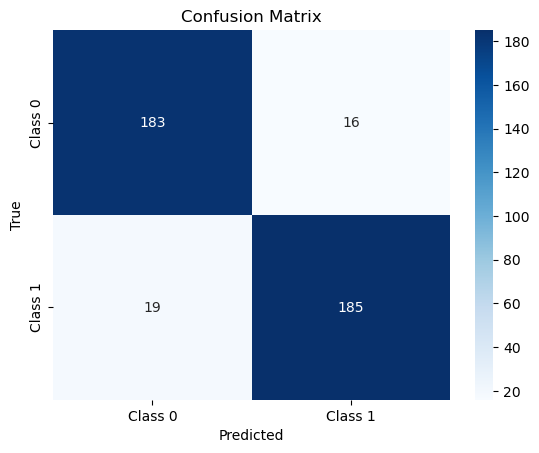

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **From the readings from the confusion matrix map, we can say that there were about 6-8% of FALSE positives and negatives which would have been fine for a larger data.**
### **The RandomForest model performance is acceptable for now since this is a small dataset but it can do better if there was more data.**

#### **KNN**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=1,weights='distance')
knn.fit(X_train,y_train)
y_pred_test = knn.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.8808933002481389

In [72]:
#Checking overfitting
y_pred_train = knn.predict(X_train)
f1_score(y_train, y_pred_train)

0.9962640099626401

#### **XGBOOST**

In [41]:
# Will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and split to train,validation and test data.
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
data_dmatrix = xgb.DMatrix(data=X_smote,label=Y_smote)


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\kumba\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [58]:
xg_class = XGBClassifier(objective ='multi:softmax',num_class=2, random_state=42,max_depth = 11, alpha = 10, n_estimators = 100)
xg_class.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=2, ...)

In [59]:
#Predicting the Test data.
y_pred_test = xg_class.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.8833746898263027

### **<font color='blue'>Feature Importance**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

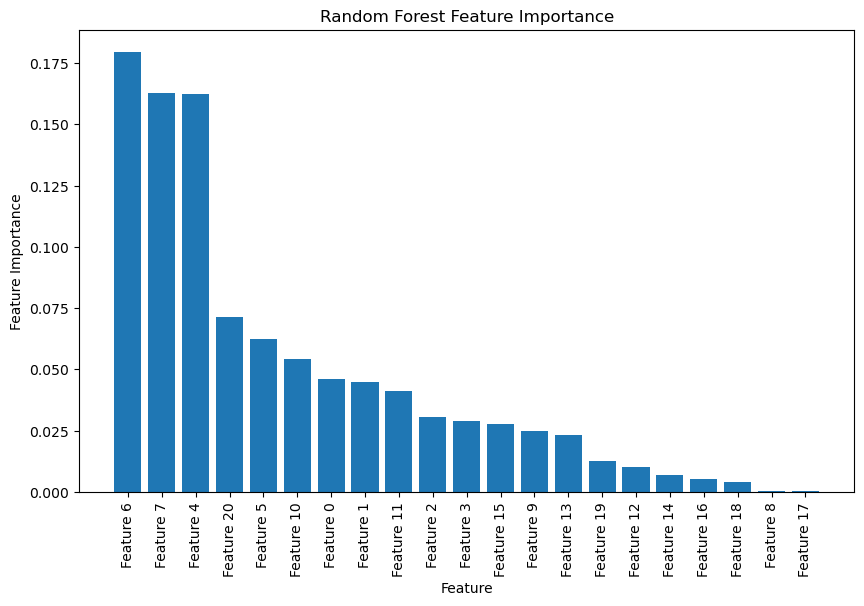

In [111]:
#Checking feature importance in RandomForest model.
feature_importance = rf.feature_importances_
num_features = X.shape[1]
feature_names = [f'Feature {i}' for i in range(num_features)]

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(num_features), feature_importance[sorted_idx], align='center')
plt.xticks(range(num_features), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [64]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GENDER                2014 non-null   int64  
 1   Car_Owner             2014 non-null   int64  
 2   Propert_Owner         2014 non-null   int64  
 3   CHILDREN              2014 non-null   int64  
 4   Annual_income         2014 non-null   float64
 5   Family_Members        2014 non-null   int64  
 6   Age                   2014 non-null   float64
 7   Experience            2014 non-null   float64
 8   Pensioner             2014 non-null   uint8  
 9   State servant         2014 non-null   uint8  
 10  Working               2014 non-null   uint8  
 11  Married               2014 non-null   uint8  
 12  Separated             2014 non-null   uint8  
 13  Single / not married  2014 non-null   uint8  
 14  Widow                 2014 non-null   uint8  
 15  House / apartment    

<IPython.core.display.Javascript object>

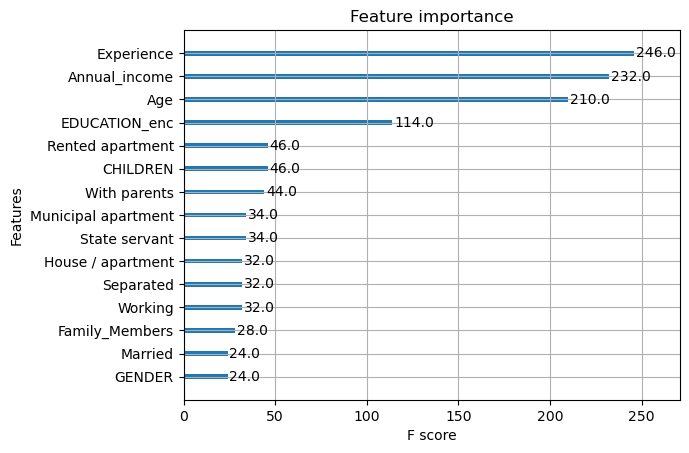

In [60]:
#Checking the feature importance of XGBoost model.
xgb.plot_importance(xg_class, max_num_features=15) 
plt.show()

 **<font color='red'>UPDATE: I figured that the ML model is overfitting as it is giving much importance to the ID column so I am deleting the column it is not important for our prediction because it will only give us a overfitted model. Also I am only splitting the data into Training and Test data as there isn't enough data for proper training if splitting validation data too.**


#### **<font color='green'>Deleted a few columns which had led to overfitting and in the process accuracy scores have been reduced which is fine because now we have a compartively more GENERALIZED ML model.**

#### **From checking the feature importance in my XGBoost and RandomForest models, it is clear that both the models give significant importance to Annual_income,Age and Experience.**

#### **I performed 5 different models to predict and find the best one with good accuracy(90%+).** 
- #### **Decision tree gave us decent accuracy but didn't do well enough in cross validation, Logistic regression wasn't good enough and KNN and XGBoost gave us good accuracy too.**
- #### **From building, tuning and predicting the models with this data we can say RandomForest model performed well in validation and test datas with good accuracy and precision, It showed low variance in cross validation which is good. In conclusion, I assume the Random Forest model performed well but could be better if there was more data.**